In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Title,Summary,Source,Source.1,Topic,Business line
0,Embraer's E190-E2 Program Development Named 20...,"Project Management Institute (PMI), the world’...",Business Wire,Business Wire,Self-awareness,Commercial
1,Jet Aviation Announces Opening of New Teterbor...,Jet Aviation announces the opening of its new ...,AviationPros.com,AviationPros.com,Expansion,Executive
2,GMF Solidifies Its Airframe Capabilities With ...,"GMF AeroAsia is adding hangars, subsidiaries a...",MRO Network,MRO Network,New facility,Commercial
3,United Technologies nets $325.2M contract for ...,The Pratt & Whitney division of United Technol...,Breitbart,Breitbart,Contract,Military
4,"Boeing wants to double in size, and Australia ...",American aircraft manufacturer Boeing expects ...,The Australian Financial Review,The Australian Financial Review,Expansion,Commercial


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
Title            748 non-null object
Summary          748 non-null object
Source           748 non-null object
Source.1         476 non-null object
Topic            747 non-null object
Business line    745 non-null object
dtypes: object(6)
memory usage: 35.1+ KB


In [5]:
df[df['Source'] != df['Source.1']][df['Source.1'].notnull()]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,Summary,Source,Source.1,Topic,Business line


# As we can see, there is no row whose value in 'Source' is different from that in 'Source.1'. Due to that, we can remove 'Source.1' column

In [6]:
df = df.drop(labels='Source.1', axis=1)
df.dropna(axis=0, inplace=True)

In [7]:
print("There are {} words".format(df['Summary'].apply(lambda x: len(x.split(' '))).sum()))

There are 24633 words


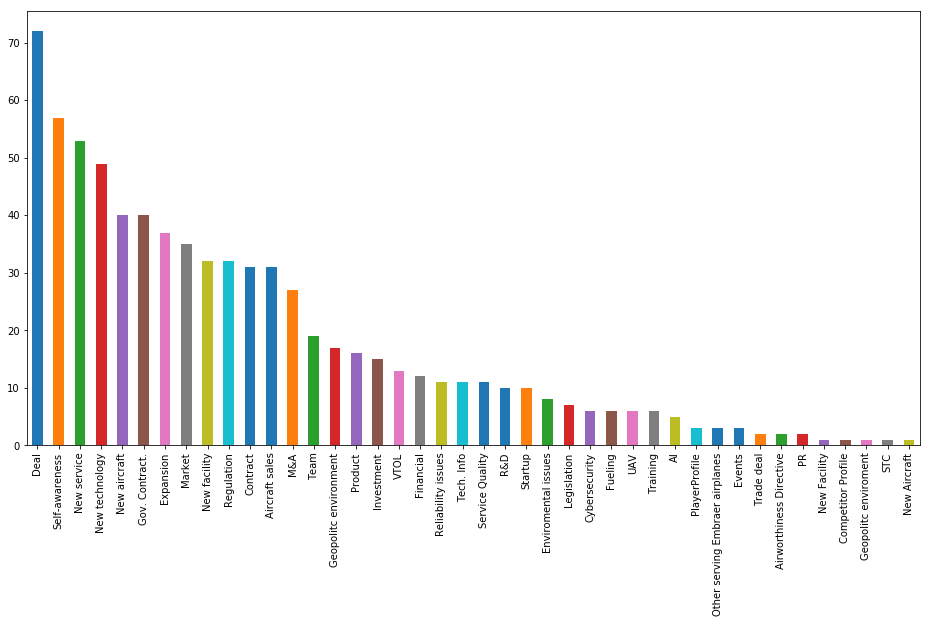

In [8]:
plt.figure(figsize=(16, 8))
df.Topic.value_counts().plot(kind='bar');

In [9]:
df.describe()

,Title,Summary,Source,Topic,Business line
count,745,745,745,745,745
unique,744,740,315,42,7
top,Embraer Announces Senior Management Shuffle,The country’s defense minister told parliament...,Aviation International News,Deal,Generic
freq,2,2,66,72,265


In [10]:
df['length'] = df['Summary'].apply(len)
df.head()

,Title,Summary,Source,Topic,Business line,length
0,Embraer's E190-E2 Program Development Named 20...,"Project Management Institute (PMI), the world’...",Business Wire,Self-awareness,Commercial,273
1,Jet Aviation Announces Opening of New Teterbor...,Jet Aviation announces the opening of its new ...,AviationPros.com,Expansion,Executive,237
2,GMF Solidifies Its Airframe Capabilities With ...,"GMF AeroAsia is adding hangars, subsidiaries a...",MRO Network,New facility,Commercial,113
3,United Technologies nets $325.2M contract for ...,The Pratt & Whitney division of United Technol...,Breitbart,Contract,Military,182
4,"Boeing wants to double in size, and Australia ...",American aircraft manufacturer Boeing expects ...,The Australian Financial Review,Expansion,Commercial,244


Following Sturges Criterion: k = 1 + 3.322*log10(n)

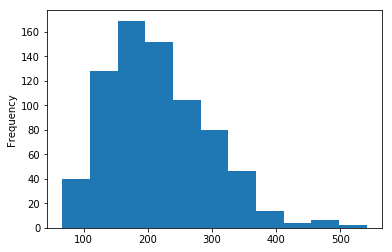

In [11]:
import math
k = math.ceil(1 + 3.322*np.log10(df.shape[0]))
df['length'].plot(bins=k, kind='hist');

There are some big summaries in the data. Let's investigate it

In [12]:
df.length.describe()

count    745.000000
mean     216.660403
std       79.132792
min       67.000000
25%      159.000000
50%      207.000000
75%      264.000000
max      541.000000
Name: length, dtype: float64

In [13]:
df[df['length'] == 541]['Summary'].iloc[0]

'“There are a lot of great aviation programs around doing good work, but the numbers and pilot diversity have not changed,” said Gary Morrison, Aviation Accreditation Board International chairperson. “That is not the case with Air Force Junior ROTC. The program provides quantifiable measurements of success and access to the single largest group of competitive and diverse students. AABI is excited to be an integral part in this very innovative program to reach students who might not otherwise be able to fulfill their dreams in aviation.”'

In [14]:
df[df['length'] == 541]

,Title,Summary,Source,Topic,Business line,length
471,CSAF Private Pilot Scholarship Program changin...,“There are a lot of great aviation programs ar...,Stripes Korea,Training,Generic,541


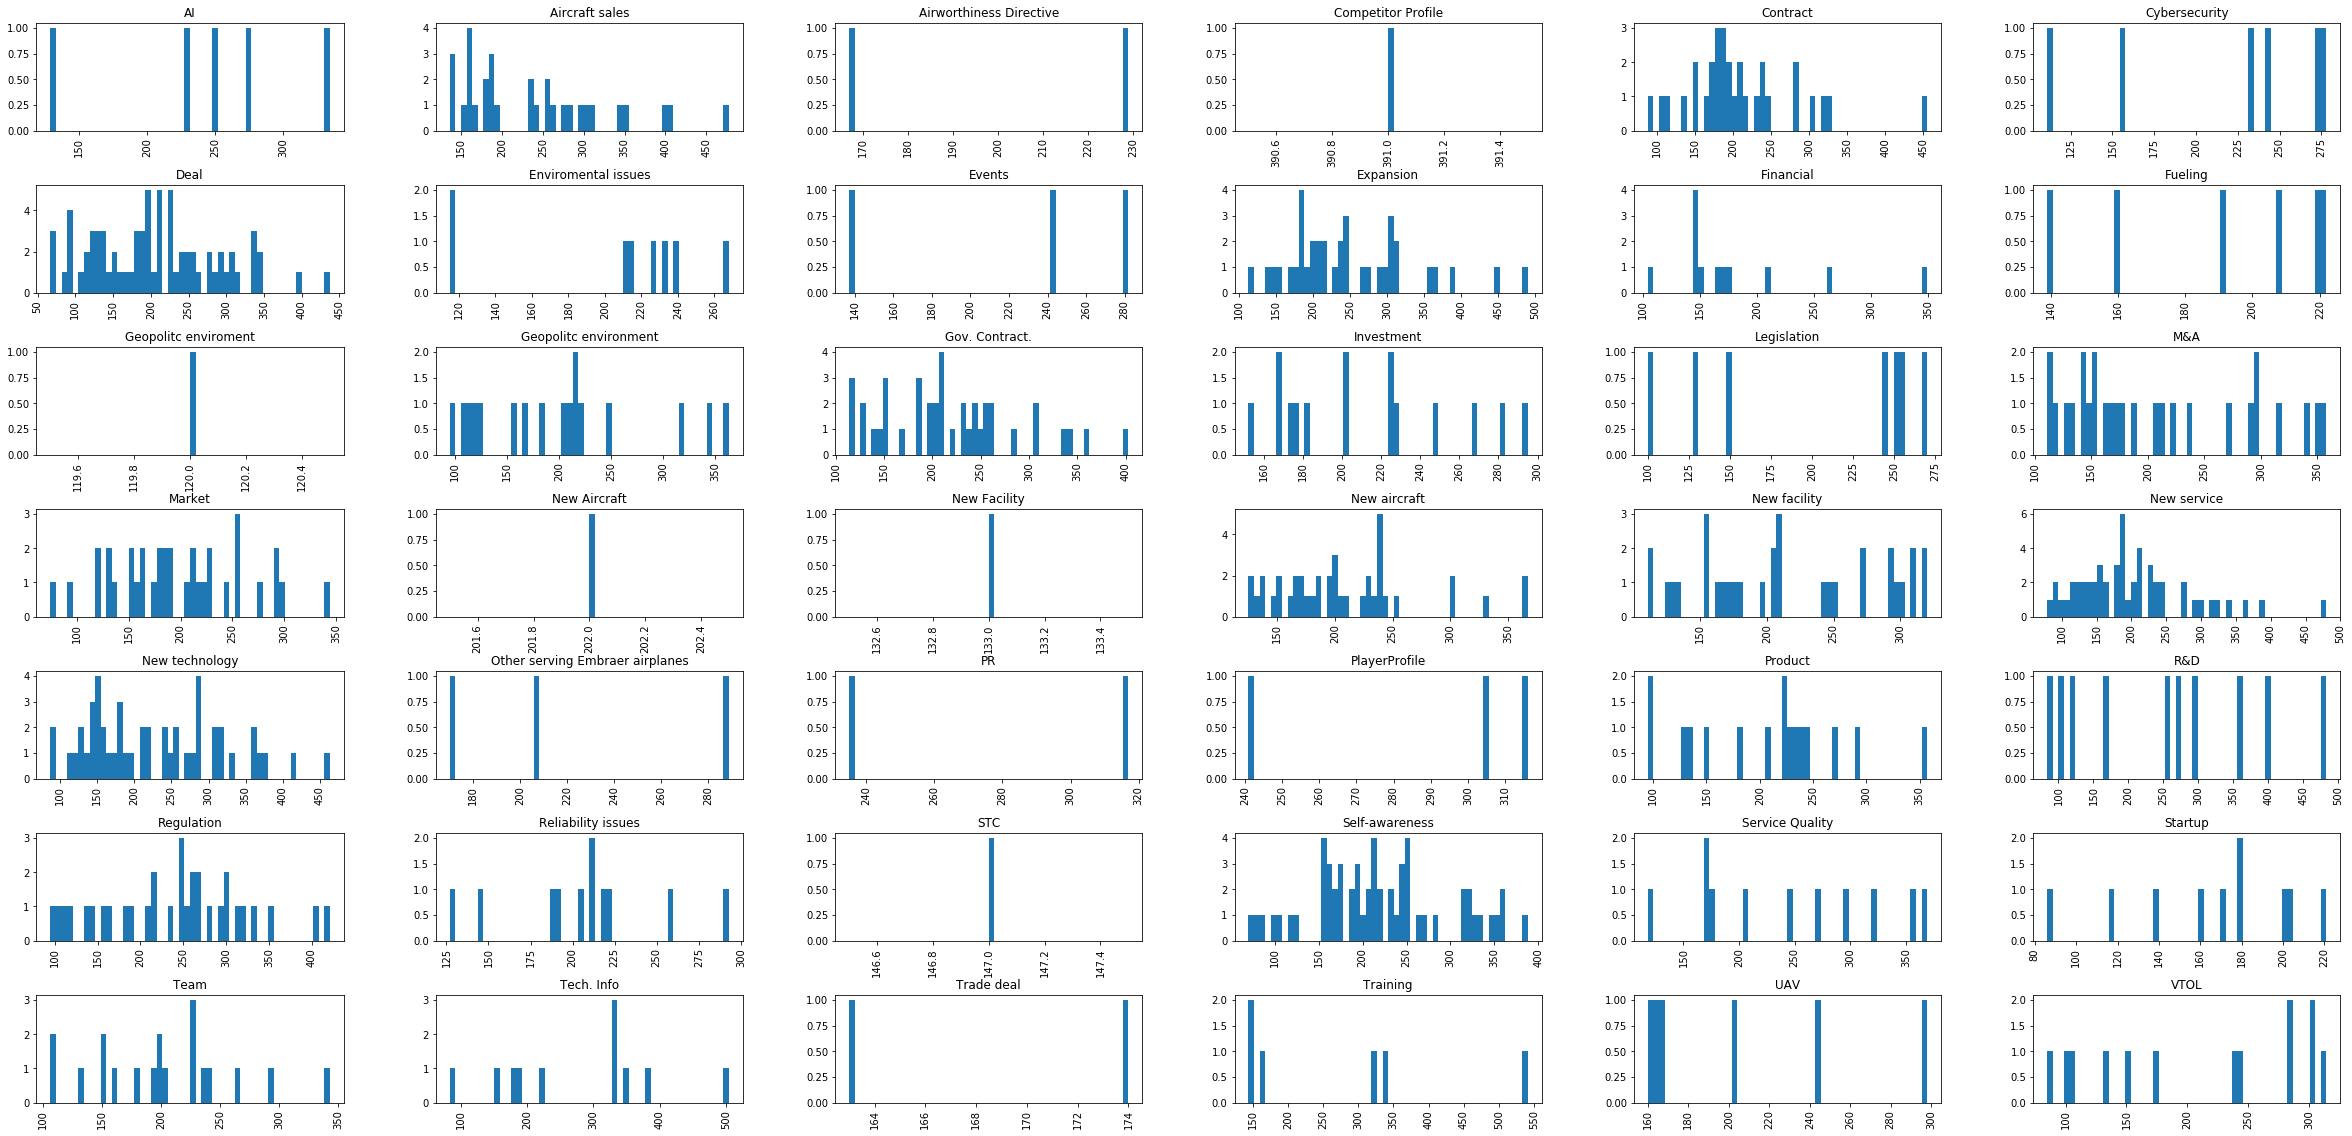

In [15]:
df.hist(column='length', by='Topic', bins=50,figsize=(40,20));

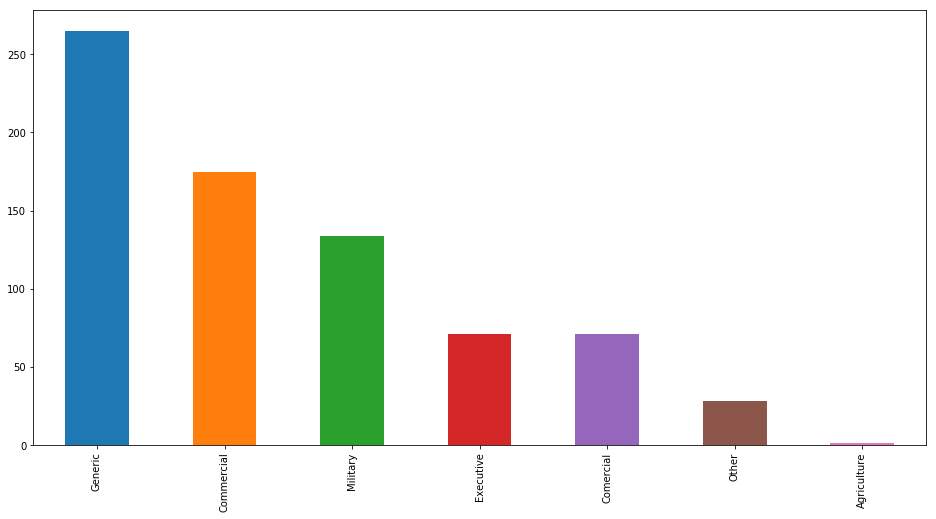

In [16]:
plt.figure(figsize=(16, 8))
df['Business line'].value_counts().plot(kind='bar');

In [17]:
df['Business line'] = df['Business line'].replace({'Commercial': 'Comercial'})

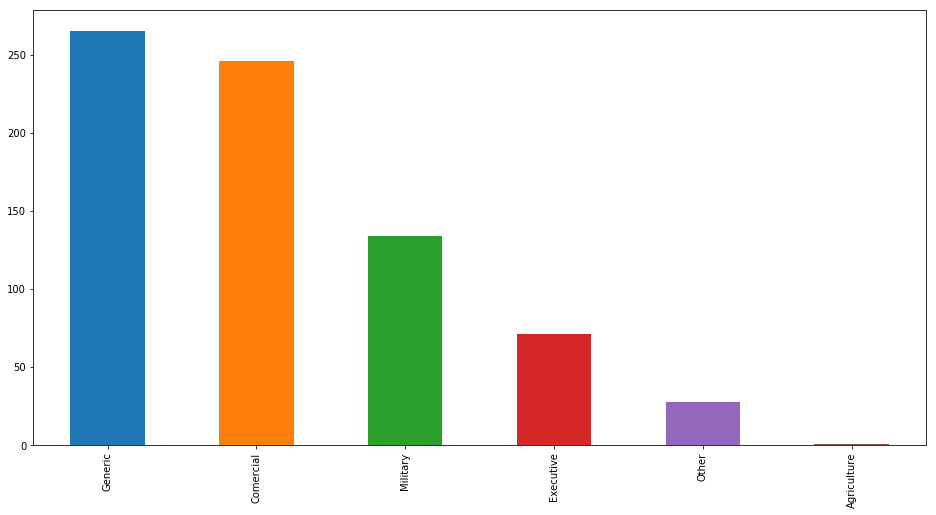

In [18]:
plt.figure(figsize=(16, 8))
df['Business line'].value_counts().plot(kind='bar');

In [30]:
df.shape

(745, 6)

In [32]:
df = df[df['Business line'] != 'Agriculture']

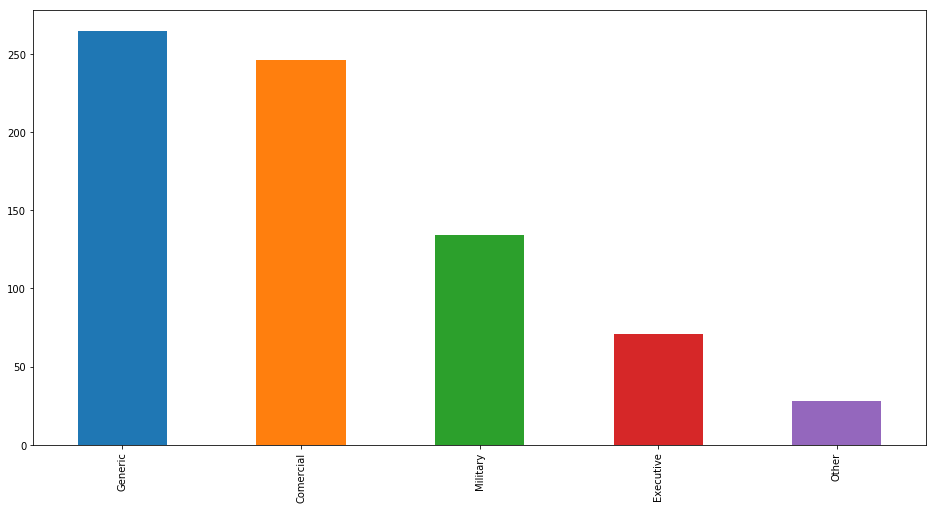

In [33]:
plt.figure(figsize=(16, 8))
df['Business line'].value_counts().plot(kind='bar');